(fin-edu:equity:fun)=
# Equity investing: correlations, plots, and fun facts

In [244]:
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

start_date = '1970-01-01'
end_date   = '2025-07-01'


(fin-edu:equity:fun:sources)=
## Data

Data used in this section are retrieved from Yahoo! Finance and online data from Robert Shiller online resources

(fin-edu:equity:fun:sources:yahoo)=
### Data from Yahoo! Finance

In [245]:
# S&P 500
# any total return index? Maybe some accumulating ETF?
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Close']
sp500 = sp500.resample('ME').last()

/tmp/ipython-input-245-2895640405.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


(fin-edu:equity:fun:sources:shiller)=
### Shiller's data

Shiller's data collects historical series of Standard&Poors 500 index, earnings, dividends, [consumer price index CPI](fin-edu:inflation:indices), 10-Year Treasury bond rate (available from Federal Reserve Economic Data).

CPI is used to evaluate **real prices** from nominal ones. 10-Year Treasury rate is taken as the **"risk-free"** rate and used to evaluate risk premium.

---


**References.** Online data from Robert Shiller:
- https://shillerdata.com/, ie_data.xls;
- old website at Yale:
http://www.econ.yale.edu/~shiller/data.htm
- FRED - Federal Reserve Economic Data, [Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis (GS10)](https://fred.stlouisfed.org/series/GS10)

In [246]:
# Load Shiller data
folder = 'https://raw.githubusercontent.com/Basics2022/bbooks-financial-edu/master/code/data/'
filen = folder+'ie_data.xls'

df_raw = pd.read_excel(filen, sheet_name='Data', header=None)


In [247]:
#> Fix the infamous Shiller spreadsheet format

# Extract the first 7 rows (rows 0–6) as headers
headers = df_raw.iloc[:8]
headers_t = headers.T
columns = headers_t.apply(lambda x: ' '.join(str(i).strip() for i in x if pd.notnull(i)), axis=1)
columns[0] = 'Date'
# Replace Cyclically Adjusted Price...or CAPE with CAPE
columns = columns.apply(lambda x: x.replace('Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE', 'CAPE'))

# Load actual data (starting from row 7)
shiller = df_raw.iloc[8:].copy()
shiller.columns = columns

# Reset index
shiller.reset_index(drop=True, inplace=True)

# Keep monthly data from 1900 onwards
shiller = shiller[shiller['Date'] >= 1900]

date_year = shiller['Date'].astype(int)
date_month = np.ceil((shiller['Date']-date_year) * 100).astype(int)

shiller['Date'] = pd.to_datetime(date_year.astype(str) + '-' + date_month.astype(str), format='%Y-%m')
shiller.set_index('Date', inplace=True)

shiller = shiller[start_date:end_date]



In [248]:
#> Inspect
shiller


,S&P Comp. P,Dividend D,Earnings E,Consumer Price Index CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,Real Earnings,...,CAPE,,Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE,,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,90.31,3.16333,5.73,37.8,1970.041667,7.79,769.22976,26.944165,113267.678094,48.806185,...,17.090541,NaN,19.681597,NaN,0.006411,1.045326,10.097412,-0.011478,-0.0172,0.005722
1970-02-01,87.16,3.16667,5.68,38,1970.125,7.24,738.491771,26.830653,109070.795731,48.125668,...,16.372587,NaN,18.865301,NaN,0.014669,1.018127,10.499537,-0.004855,-0.030795,0.02594
1970-03-01,88.65,3.17,5.63,38.2,1970.208333,7.07,747.18374,26.718245,110683.391015,47.452278,...,16.531691,NaN,19.058796,NaN,0.01632,0.983445,10.633891,-0.016883,-0.034335,0.017452
1970-04-01,85.95,3.17333,5.59333,38.5,1970.291667,7.39,718.78199,26.537899,106803.720667,46.775857,...,15.873068,NaN,18.311411,NaN,0.016084,0.970499,10.376358,-0.015618,-0.025014,0.009395
1970-05-01,76.06,3.17667,5.55667,38.6,1970.375,7.91,634.426115,26.497008,94597.391291,46.34889,...,13.983836,NaN,16.14957,NaN,0.019662,1.011407,10.044155,0.000329,-0.014348,0.014677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,5683.983333,76.145301,216.69,319.799,2025.208333,4.28,5722.525411,76.661629,3845325.219492,218.159336,...,34.78475,NaN,37.348615,NaN,0.016749,1.003567,39.62579,NaN,NaN,NaN
2025-04-01,5369.495714,76.546867,NaN,320.795,2025.291667,4.28,5389.121125,76.826645,3625591.937799,NaN,...,32.62127,NaN,35.015341,NaN,0.018767,0.992343,39.643654,NaN,NaN,NaN
2025-05-01,5810.919524,76.948434,NaN,321.465,2025.375,4.42,5820.002899,77.068716,3919793.241258,NaN,...,35.172023,NaN,37.769849,NaN,0.014834,1.006896,39.258095,NaN,NaN,NaN


(fin-edu:equity:fun:data)=
## Historical data of equity market and economy

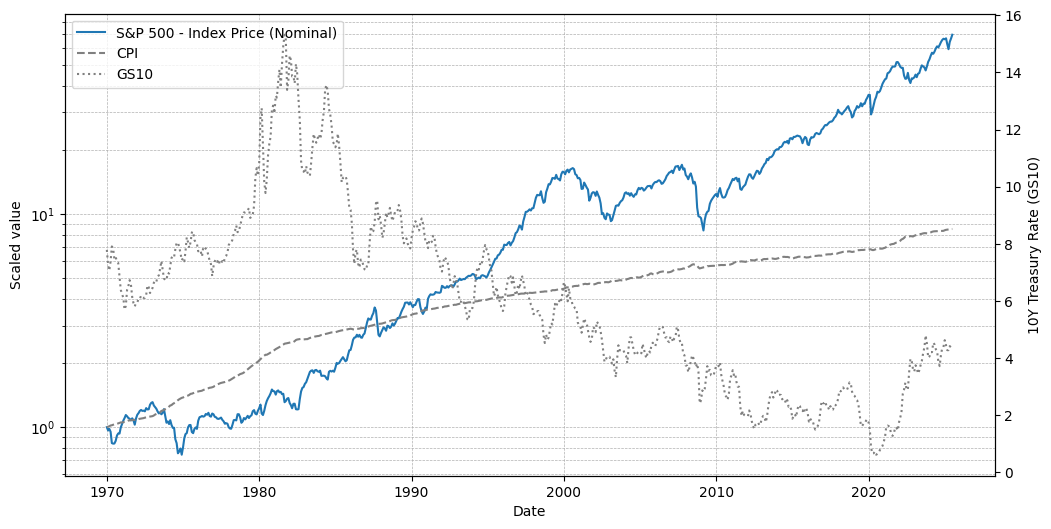

In [249]:
#> Nominal Price of S&P 500
fig, ax1 = plt.subplots(1,1, figsize=(12, 6))
ax1.plot(shiller.index, shiller['S&P Comp. P']/shiller['S&P Comp. P'].iloc[0], label='S&P 500 - Index Price (Nominal)')
ax1.plot(shiller.index, shiller['Consumer Price Index CPI']/shiller['Consumer Price Index CPI'].iloc[0], '--', color='gray', label='CPI')

ax2 = ax1.twinx()
ax2.plot(shiller.index, shiller['Long Interest Rate GS10'], ':', color='gray', label='GS10')
ax2.set_ylabel('10Y Treasury Rate (GS10)')

# plt.plot(sp500.index, sp500, label='S&P 500 - Yahoo! Finance')
ax1.set_yscale('log')
ax1.set_title('')
ax1.set_ylabel('Scaled value')
ax1.set_xlabel('Date')
ax1.grid(True, which='both', ls='--', lw=0.5)

#> Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.show()


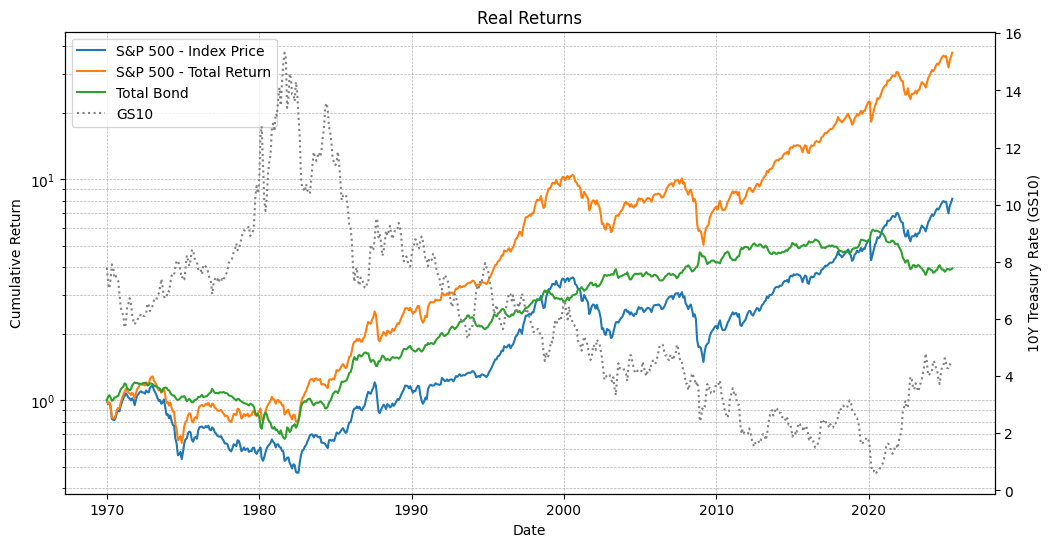

In [250]:
#> Real returns
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(shiller.index, shiller['Real Price']/shiller['Real Price'].iloc[0], label='S&P 500 - Index Price')
ax1.plot(shiller.index, shiller['Real Total Return Price']/shiller['Real Total Return Price'].iloc[0], label='S&P 500 - Total Return')
ax1.plot(shiller.index, shiller['Real Total Bond Returns']/shiller['Real Total Bond Returns'].iloc[0], label='Total Bond')

ax2 = ax1.twinx()
ax2.plot(shiller.index, shiller['Long Interest Rate GS10'], ':', color='gray', label='GS10')
ax2.set_ylabel('10Y Treasury Rate (GS10)')

ax1.set_yscale('log')
ax1.set_title('Real Returns')
ax1.set_ylabel('Cumulative Return')
ax1.set_xlabel('Date')
ax1.grid(True, which='both', ls='--', lw=0.5)

#> Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.show()


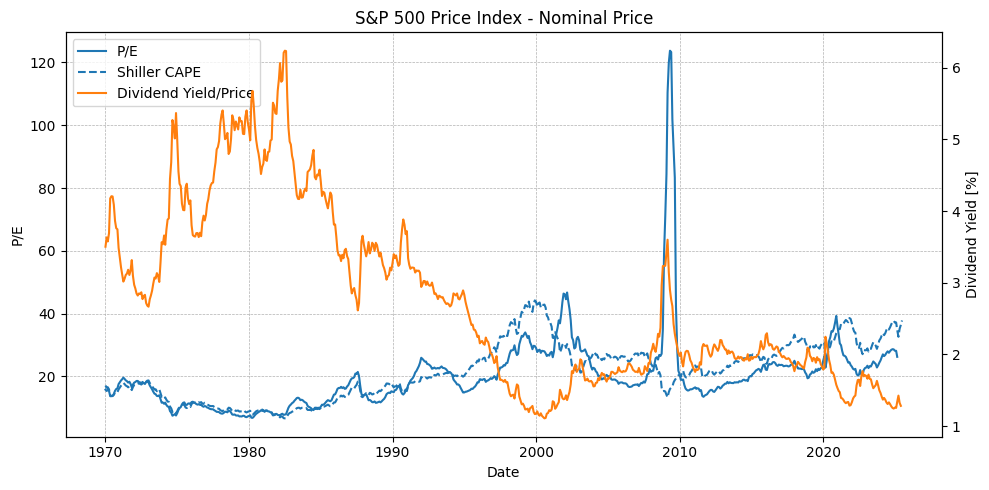

In [251]:
#> Earnings/Price and Dividend/Price ratios
fig, ax1 = plt.subplots(1,1, figsize=(10, 5))

# P/E and Shiller PE
ax1.plot(shiller.index, shiller['S&P Comp. P'] / shiller['Earnings E'], label='P/E')
ax1.plot(shiller.index, shiller['CAPE'], '--', color=plt.cm.tab10.colors[0], label='Shiller CAPE')

# Dividend Yield
ax2 = ax1.twinx()
ax2.plot(shiller.index, shiller['Dividend D'] / shiller['S&P Comp. P'] * 100, color=plt.cm.tab10.colors[1], label='Dividend Yield/Price')

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')
ax1.set_title('S&P 500 Price Index - Nominal Price')
ax1.set_ylabel('P/E')
ax1.set_xlabel('Date')
ax2.set_ylabel('Dividend Yield [%]')
ax1.grid(True, which='both', ls='--', lw=0.5)

plt.tight_layout()
plt.show()


## Historical Rolling Returns

Cumulative return reads

$$R_t = \dfrac{Y_t - Y_0}{Y_0} = \dfrac{Y_t}{Y_0} - 1 \ .$$

Annualized composite return

$$r = \left( \dfrac{Y_t}{Y_0} \right)^{\frac{1}{n}} - 1$$

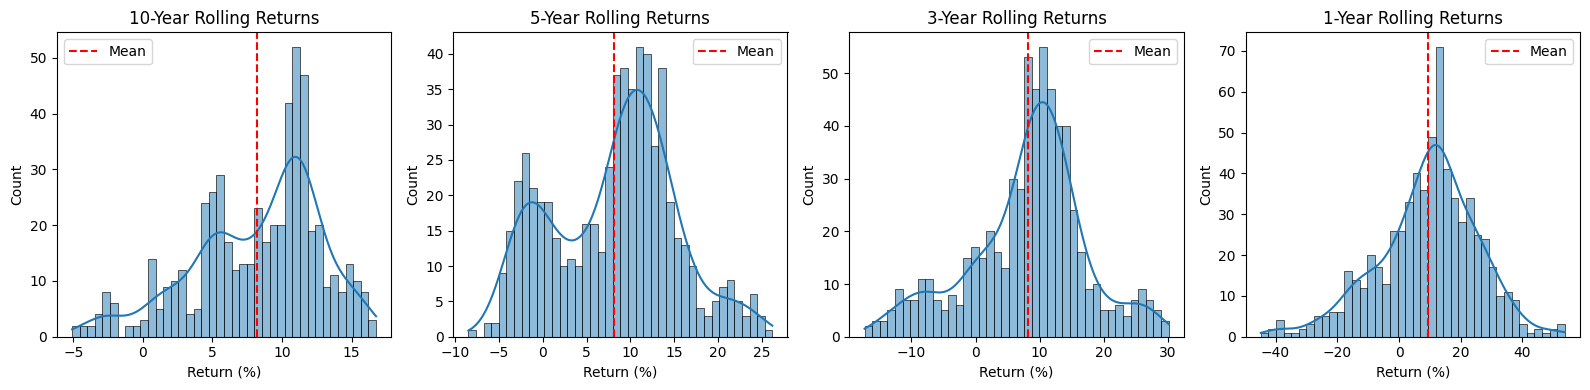

In [252]:
#> Nominal Index Price
returns = sp500.pct_change().dropna()
cumulative_returns = {}
composite_returns = {}

year_returns = [10, 5, 3, 1]

for years in year_returns:
    months = years * 12
    rolling = sp500.pct_change(periods=months)
    cumulative_returns[years] = rolling.dropna()
    composite_returns[years] = ( ( 1 + rolling )**(1/years) - 1).dropna()


import seaborn as sns

plt.figure(figsize=(16, 4))
for i, y in enumerate(year_returns):
    plt.subplot(1, 4, i+1)
    sns.histplot(composite_returns[y]*100, bins=40, kde=True)
    plt.title(f'{y}-Year Rolling Returns')
    plt.xlabel('Return (%)')
    plt.axvline(np.mean(composite_returns[y]*100), color='r', linestyle='--', label='Mean')
    plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-253-1320558590.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sep_rolling = shiller['Real Total Return Price'].pct_change(periods=months)
/tmp/ipython-input-253-1320558590.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_rolling = shiller['Real Total Bond Returns'].pct_change(periods=months)


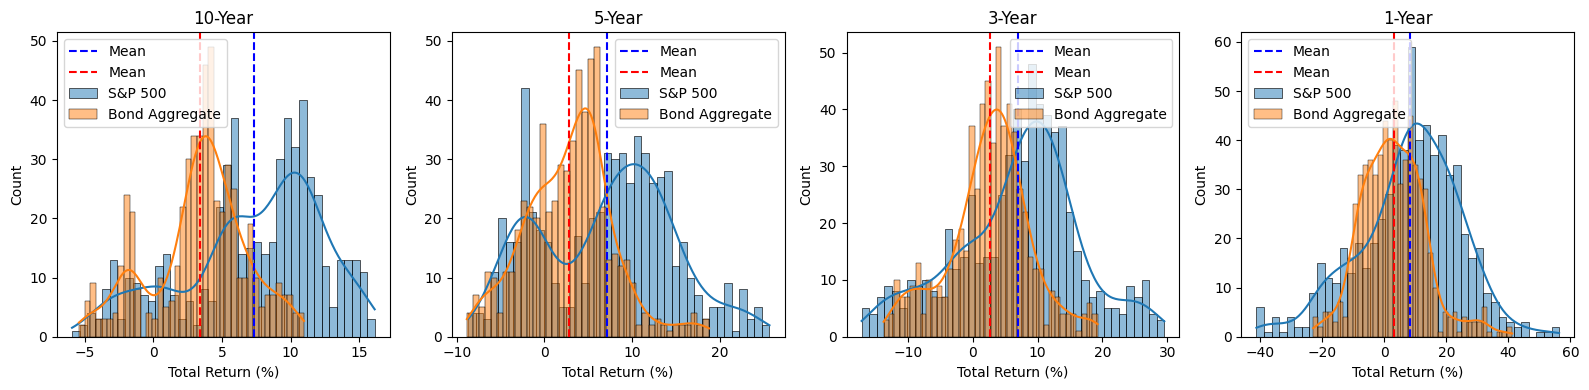

In [253]:
#> Real Index Price
sep_cumulative_returns = {}
sep_composite_returns = {}
agg_cumulative_returns = {}
agg_composite_returns = {}

year_returns = [10, 5, 3, 1]

for years in year_returns:
    months = years * 12
    sep_rolling = shiller['Real Total Return Price'].pct_change(periods=months)
    sep_cumulative_returns[years] = sep_rolling.dropna()
    sep_composite_returns[years] = ( ( 1 + sep_rolling )**(1/years) - 1).dropna()

    agg_rolling = shiller['Real Total Bond Returns'].pct_change(periods=months)
    agg_cumulative_returns[years] = agg_rolling.dropna()
    agg_composite_returns[years] = ( ( 1 + agg_rolling )**(1/years) - 1).dropna()


import seaborn as sns

plt.figure(figsize=(16, 4))
for i, y in enumerate(year_returns):
    plt.subplot(1, 4, i+1)
    sns.histplot(sep_composite_returns[y]*100, bins=40, kde=True, alpha=.5, label='S&P 500')
    sns.histplot(agg_composite_returns[y]*100, bins=40, kde=True, alpha=.5, label='Bond Aggregate')
    plt.title(f'{y}-Year')
    plt.xlabel('Total Return (%)')
    plt.axvline(np.mean(sep_composite_returns[y]*100), color='blue', linestyle='--', label='Mean')
    plt.axvline(np.mean(agg_composite_returns[y]*100), color='red', linestyle='--', label='Mean')
    plt.legend()

plt.tight_layout()
plt.show()

## Return vs. Evaluation - Shiller data


In [254]:
# Compute forward 10-year returns
for y in year_returns:
    months = y * 12
    shiller[f'{y}Y_forward_return'] = ( shiller['Real Total Return Price'].shift(-months) / shiller['Real Total Return Price'] )**(1/y) - 1


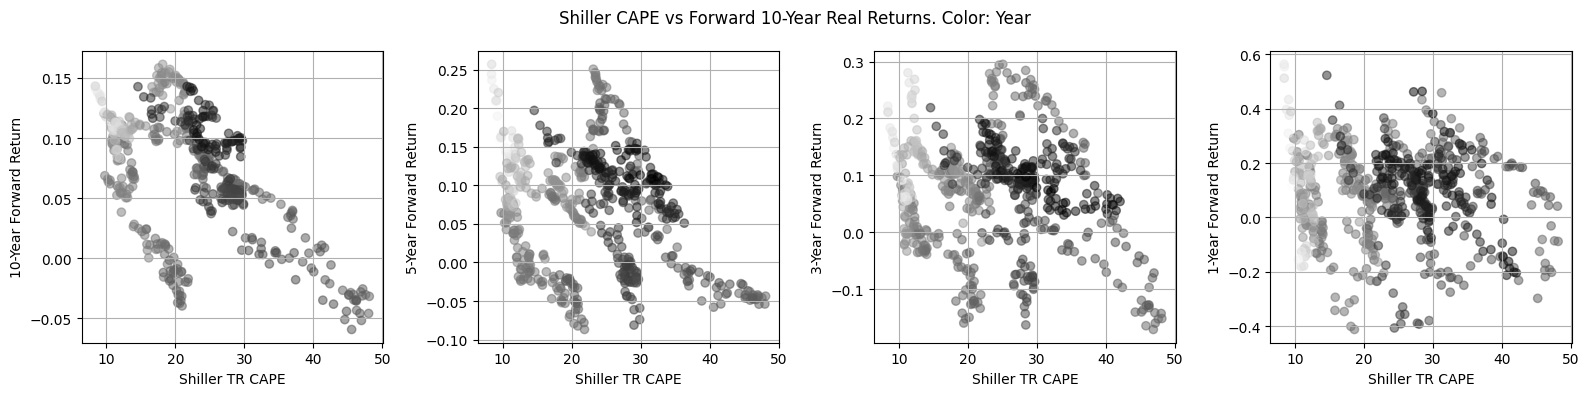

In [272]:
# Plot CAPE vs future returns
fig, ax = plt.subplots(1,4, figsize=(16, 4))

iy = 0
for y in year_returns:
    ax[iy].scatter(shiller['Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE'], shiller[f'{y}Y_forward_return'], c=shiller['Long Interest Rate GS10'], cmap='gray', alpha=0.5)
    ax[iy].set_xlabel('Shiller TR CAPE')
    ax[iy].set_ylabel(f'{y}-Year Forward Return')
    ax[iy].grid(True)

    iy += 1

fig.suptitle('Shiller CAPE vs Forward 10-Year Real Returns. Color: Year')

fig.tight_layout()
plt.show()

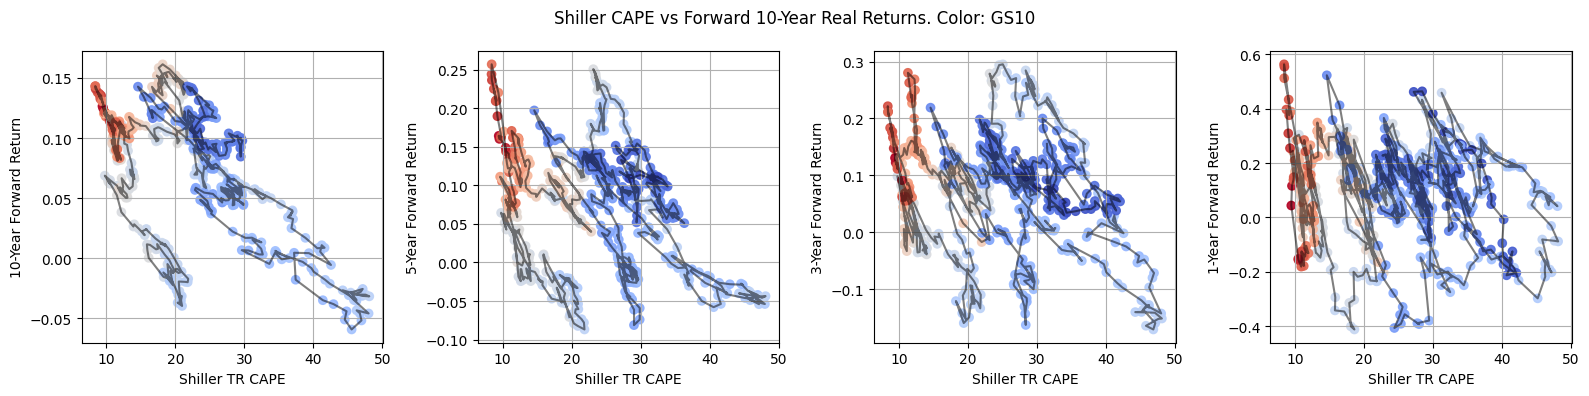

In [273]:
# Plot CAPE vs future 10y return
fig, ax = plt.subplots(1,4, figsize=(16, 4))

iy = 0
for y in year_returns:

    ax[iy].plot(shiller['Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE'], shiller[f'{y}Y_forward_return'], color='black', alpha=0.5)
    ax[iy].scatter(shiller['Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE'], shiller[f'{y}Y_forward_return'], c=shiller['Long Interest Rate GS10'], cmap='coolwarm', alpha=0.9)
    ax[iy].set_xlabel('Shiller TR CAPE')
    ax[iy].set_ylabel(f'{y}-Year Forward Return')
    ax[iy].grid(True)

    iy += 1

fig.suptitle('Shiller CAPE vs Forward 10-Year Real Returns. Color: GS10')

fig.tight_layout()
plt.show()

In [257]:
# # Using already processed Shiller and S&P data
# # Join PE with returns
# merged = shiller[['CAPE']].copy()
# for y in [1, 3, 5, 10]:
#     merged[f'{y}Y_fwd_ret'] = shiller['Price'].shift(-y*12) / shiller['Price'] - 1

# sns.pairplot(merged.dropna(), vars=[f'{y}Y_fwd_ret' for y in [1, 3, 5, 10]], hue='CAPE', palette='coolwarm')


## Real Return and Equity Risk Premium

Historical ("driving looking into the rear mirror")

$$\text{ERP}_{\text{realized}} = \text{Return on Equity} - \text{Risk-Free Return}$$

or implied (future)

$$\text{ERP}_{\text{implied}} = \text{Earning Yield} - \text{Risk-Free Rate} \ ,$$

with $\text{Earning Yield} \sim \frac{E}{P} \sim \frac{1}{\text{CAPE}}$.

/tmp/ipython-input-275-3296159330.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ( ( shiller['Real Total Return Price'].pct_change(12*years) + 1 )**(1/years) - 1 \
/tmp/ipython-input-275-3296159330.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  -( shiller['Long Interest Rate GS10'].pct_change(12*years) + 1 )**(1/years) + 1 + shiller['Consumer Price Index CPI'].pct_change(12) ) * 100.
/tmp/ipython-input-275-3296159330.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version

Date
1970-01-01         NaN
1970-02-01         NaN
1970-03-01         NaN
1970-04-01         NaN
1970-05-01         NaN
                ...   
2025-03-01    0.023907
2025-04-01    0.023113
2025-05-01    0.023549
2025-06-01    0.024270
2025-07-01    0.023614
Name: Consumer Price Index CPI, Length: 667, dtype: float64


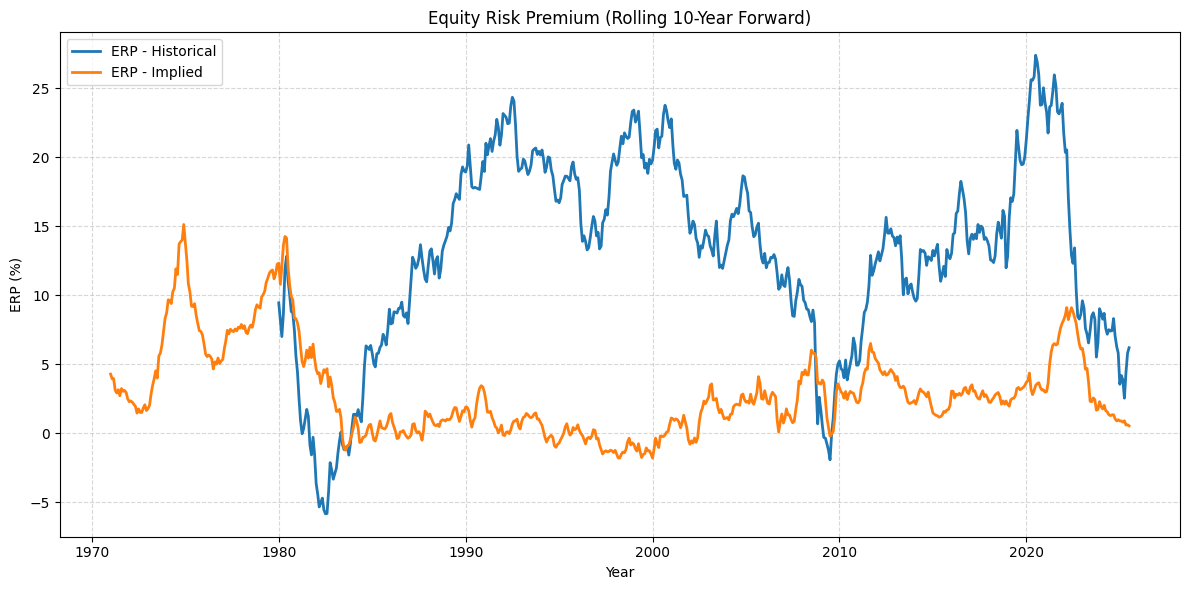

In [275]:
# Plot Real S&P 500 vs 10Y Treasury
years = 10
shiller['Equity Premium Historical'] = \
  ( ( shiller['Real Total Return Price'].pct_change(12*years) + 1 )**(1/years) - 1 \
   -( shiller['Long Interest Rate GS10'].pct_change(12*years) + 1 )**(1/years) + 1 + shiller['Consumer Price Index CPI'].pct_change(12) ) * 100.
shiller['Equity Premium Implied'] = 1/shiller['Cyclically Adjusted Total Return Price Earnings Ratio TR P/E10 or TR CAPE']*100 - shiller['Long Interest Rate GS10'] + 100 * shiller['Consumer Price Index CPI'].pct_change(12)

print(shiller['Consumer Price Index CPI'].pct_change(12))

plt.figure(figsize=(12, 6))
plt.plot(shiller['Equity Premium Historical'], label='ERP - Historical', linewidth=2)
plt.plot(shiller['Equity Premium Implied'], label='ERP - Implied', linewidth=2)
plt.title('Equity Risk Premium (Rolling 10-Year Forward)')
plt.ylabel('ERP (%)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Investing at ATH vs. investing non at ATH

In [297]:
#> Define range of "ATH"-condition
diff_ath = .05    # 5.0%

ath = sp500['^GSPC'].cummax()
is_ath = sp500['^GSPC'] >= (1 - diff_ath) * ath

return_df = pd.DataFrame(index=sp500.index)
for y in year_returns:
    months = y * 12
    return_df[f'{y}y_fwd'] = ( sp500 / sp500.shift(months) )**(1/y) - 1.

return_df['is_ath'] = is_ath



In [298]:
return_df

,10y_fwd,5y_fwd,3y_fwd,1y_fwd,is_ath
Date,,,,,
1970-01-31,NaN,NaN,NaN,NaN,True
1970-02-28,NaN,NaN,NaN,NaN,True
1970-03-31,NaN,NaN,NaN,NaN,True
1970-04-30,NaN,NaN,NaN,NaN,False
1970-05-31,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...
2025-02-28,0.109608,0.150484,0.108300,0.168404,True
2025-03-31,0.104989,0.167731,0.073963,0.068039,False
2025-04-30,0.103207,0.138427,0.104612,0.105918,False


In [301]:
#> Average and standard deviation of returns
for y in year_returns:
    print(f"\n{y}Y-Return")
    for is_ath_logical in [ True, False ]:
        print(f"ATH: {is_ath_logical}")
        print(f"mean   : {np.mean(return_df[return_df['is_ath'] == is_ath_logical][f'{y}y_fwd'])}")
        print(f"std.dev: {np.std(return_df[return_df['is_ath'] == is_ath_logical][f'{y}y_fwd'])}")



10Y-Return
ATH: True
mean   : 0.0958995658665518
std.dev: 0.03599683666200298
ATH: False
mean   : 0.06613154224116366
std.dev: 0.05011022957255446

5Y-Return
ATH: True
mean   : 0.12562916322409942
std.dev: 0.045559673717624496
ATH: False
mean   : 0.039468106464339105
std.dev: 0.06357346062410822

3Y-Return
ATH: True
mean   : 0.13465398545456378
std.dev: 0.05882152503082066
ATH: False
mean   : 0.03335135641958594
std.dev: 0.08621129359620724

1Y-Return
ATH: True
mean   : 0.18139393926101685
std.dev: 0.10674696971496317
ATH: False
mean   : 0.011449823467914297
std.dev: 0.1594612574106382


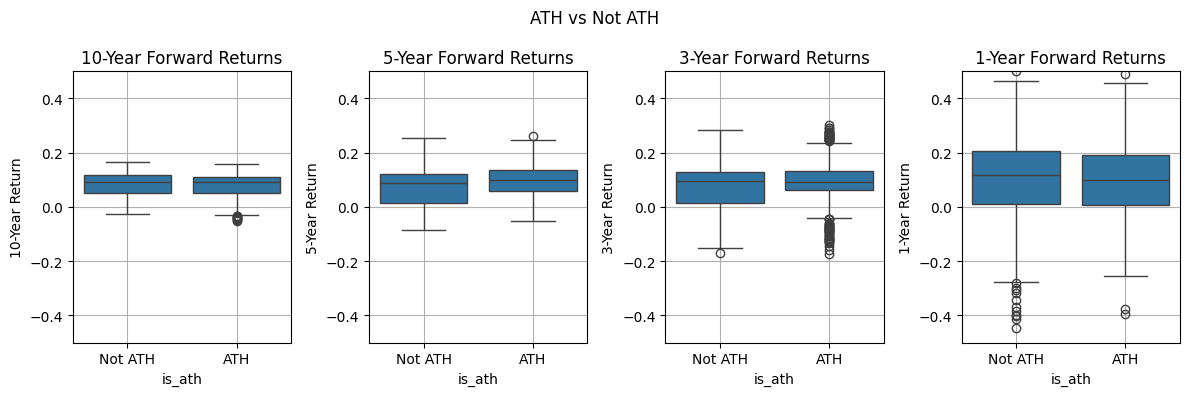

In [279]:

fig, ax = plt.subplots(1,4, figsize=(12, 4))

iy = 0
for y in year_returns:
    sns.boxplot(x='is_ath', y=f'{y}y_fwd', data=return_df, ax=ax[iy])
    ax[iy].set_xticks([0, 1], ['Not ATH', 'ATH'])
    ax[iy].set_ylabel(f'{y}-Year Return')
    ax[iy].set_title(f'{y}-Year Forward Returns')
    ax[iy].grid(True)
    ax[iy].set_ylim([-.5, .5])
    iy += 1

fig.suptitle('ATH vs Not ATH')

plt.tight_layout()

plt.show()

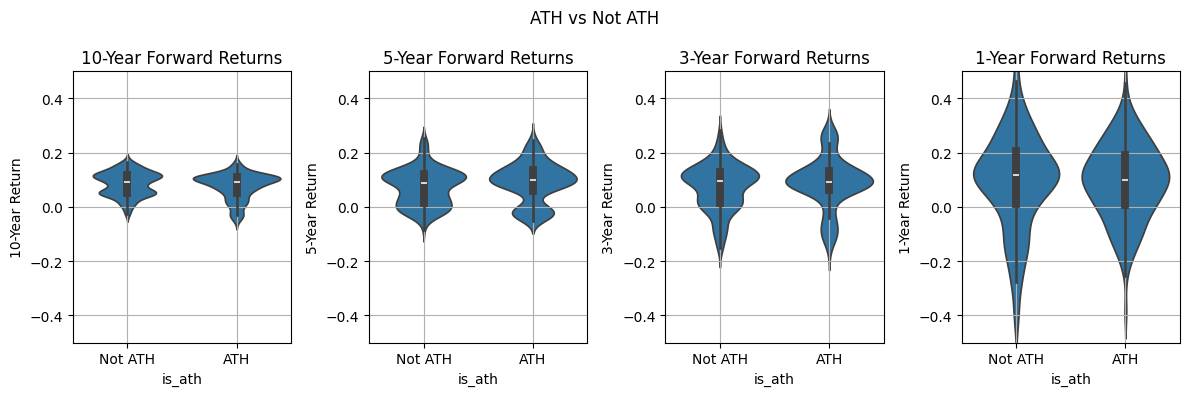

In [282]:

fig, ax = plt.subplots(1,4, figsize=(12, 4))

iy = 0
for y in year_returns:
    sns.violinplot(x='is_ath', y=f'{y}y_fwd', inner='box', data=return_df, ax=ax[iy])
    ax[iy].set_xticks([0, 1], ['Not ATH', 'ATH'])
    ax[iy].set_ylabel(f'{y}-Year Return')
    ax[iy].set_title(f'{y}-Year Forward Returns')
    ax[iy].grid(True)
    ax[iy].set_ylim([-.5, .5])
    iy += 1

fig.suptitle('ATH vs Not ATH')

plt.tight_layout()

plt.show()